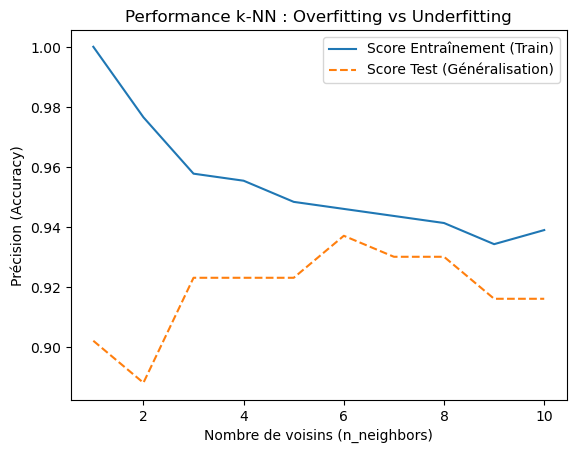

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 1. Charger les données
cancer = load_breast_cancer()

# 2. Séparer (Train / Test)
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

# On prépare des listes pour enregistrer les scores
training_accuracy = []
test_accuracy = []

# On essaie n_neighbors de 1 à 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # Création du modèle
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    # Entraînement
    clf.fit(X_train, y_train)
    # On enregistre le score sur le jeu d'entraînement (Training set)
    training_accuracy.append(clf.score(X_train, y_train))
    # On enregistre le score sur le jeu de test (Generalization)
    test_accuracy.append(clf.score(X_test, y_test))

# 3. Création du Graphique
plt.plot(neighbors_settings, training_accuracy, label="Score Entraînement (Train)")
plt.plot(neighbors_settings, test_accuracy, label="Score Test (Généralisation)", linestyle="--")
plt.ylabel("Précision (Accuracy)")
plt.xlabel("Nombre de voisins (n_neighbors)")
plt.legend()
plt.title("Performance k-NN : Overfitting vs Underfitting")
plt.show()
